# Fake News Detection

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Loading Data

In [3]:
data_fake=pd.read_csv('../data/Fake.csv')
data_true=pd.read_csv('../data/True.csv')


#### Exploratory Data Analysis

In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# data_true.tail()

<!-- 
























data_true['subject'].value_counts() -->

<Axes: xlabel='subject', ylabel='count'>

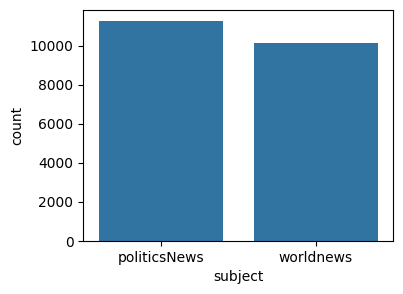

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(x='subject',data=data_true)

In [15]:
from wordcloud import WordCloud

In [16]:
text=' '.join(data_true['text'].tolist())

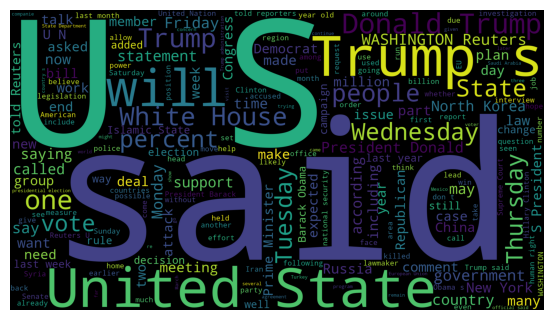

In [26]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
fig=plt.figure(figsize=(6,3))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [27]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [28]:
# data_fake.tail()

In [29]:
data_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

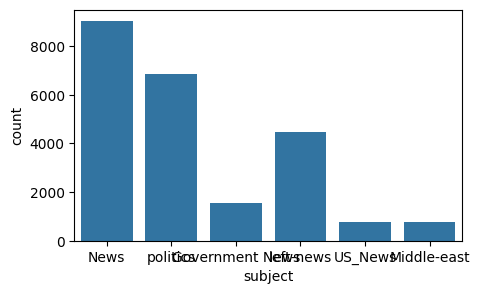

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x='subject',data=data_fake)

In [31]:
# dta_fake['text'].tolist()
text=' '.join(data_fake['text'].tolist())

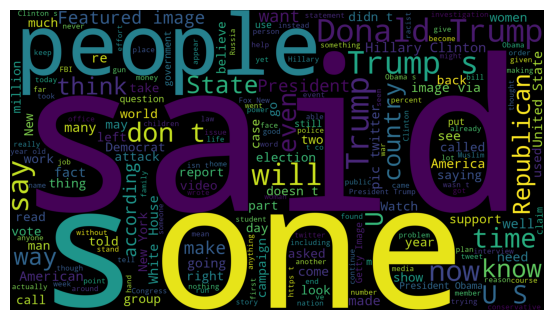

In [32]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
fig=plt.figure(figsize=(6,3))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

### Labeling

In [4]:
data_fake["class"]=0
data_true['class']=1

#### Merge Data

In [5]:
data_merge=pd.concat([data_fake, data_true], axis = 0)

In [57]:
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


##### Randomly shuffling the dataframe

In [6]:
data_merge = data_merge.sample(frac = 1)  # taking 100% of the data, but in a random order.

In [7]:
data_merge.reset_index(inplace = True)
data_merge.drop(['index'], axis = 1, inplace = True)

In [8]:
data_merge.to_csv('data_merge', index=False)

<Axes: xlabel='class', ylabel='count'>

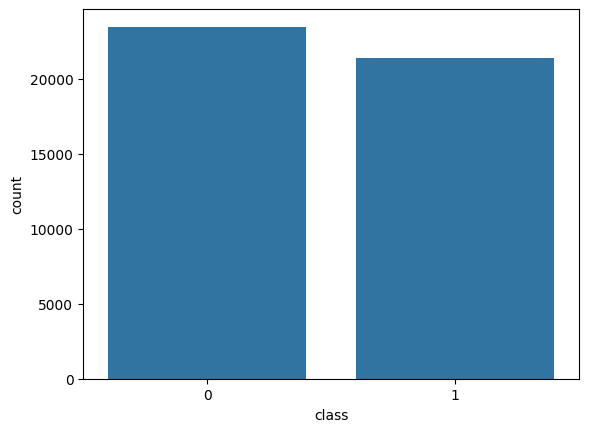

In [128]:
sns.countplot(x='class',data=data_merge)

#### Indexes with empty Data

In [9]:
empty_index=[index for index,text in enumerate(data_merge['text'].tolist()) if str(text).strip()==""]

In [10]:
data_merge.iloc[empty_index]

,title,text,subject,date,class
0,FAKE CNN and MSNBC Caught Claiming “LIVE” Gues...,,politics,"Mar 23, 2017",0
150,WOW! ANGRY NANCY PELOSI Calls Defunding PLANNE...,,politics,"Jan 15, 2017",0
159,ELEMENTARY SCHOOL STUDENTS Just Got A Big SURP...,,politics,"Mar 7, 2017",0
278,HILLARY CLINTON RAPE ENABLER: “What kind of mo...,,left-news,"Oct 8, 2016",0
310,(VIDEO) THE INCREDIBLE JOHN BOLTON: WHAT HILL’...,,politics,"May 24, 2015",0
...,...,...,...,...,...
44568,DEMOCRAT ALAN DERSHOWITZ Calls Out Court’s Rul...,,Government News,"Mar 20, 2017",0
44569,(VIDEO) LIBERAL PUNDIT: OBAMA WORST POTUS EVER,,politics,"May 12, 2015",0
44596,YES! NEWT GINGRICH Rips Into ABC Anchor Over A...,,politics,"Oct 16, 2016",0
44674,STUNNING! FORMER DISNEY TECH WORKER’S Emotiona...,,politics,"Feb 25, 2016",0


#### Drop Empty Indexes

In [11]:
data_merge.drop(index=empty_index, inplace=True)

#### Merege columns

In [12]:
data_merge['text'] = data_merge['title'].astype(str) + " " + data_merge['text'].astype(str)

In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Drop columns

In [14]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [15]:
#count of missing values
data.isnull().sum() 


text     0
class    0
dtype: int64

In [16]:
data.columns

Index(['text', 'class'], dtype='object')

In [102]:
data.head()

,text,class
0,British PM May appoints Julian Smith as chief ...,1
1,Man arrested at Trump rally said he wanted to ...,1
2,U.S. panel probing Benghazi attack to report w...,1
3,Liz Cheney's Wyoming campaign backed by big na...,1
4,Indian police arrest Christian priest after co...,1


### Preprocessing

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+', '',text)
    # text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [18]:
data['text'] = data['text'].apply(wordopt)

In [106]:
# re.sub(r'[^a-zA-Z0-9\s]', '','this ,. @ # is great')

### Features Extraction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(data['text']).toarray()
y = data['class']

In [46]:
# print(X)

In [47]:
# print(y)

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    percision = precision_score(y_test,y_pred)
    classification_r=classification_report(y_test, y_pred)
    confusion_m=confusion_matrix(y_test, y_pred)
    return accuracy,percision, classification_r,confusion_m

In [45]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_classification_report, current_confusion_matrix = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )
    
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    print("Classification Report:\n", current_classification_report)
    print("Confusion Matrix:\n", current_confusion_matrix)
    print("\n" + "="*50 + "\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy: 0.9959340411113621
Precision: 0.9948932219127206
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4554
           1       0.99      1.00      1.00      4300

    accuracy                           1.00      8854
   macro avg       1.00      1.00      1.00      8854
weighted avg       1.00      1.00      1.00      8854

Confusion Matrix:
 [[4532   22]
 [  14 4286]]


For NB
Accuracy: 0.9505308335215722
Precision: 0.949487895716946
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4554
           1       0.95      0.95      0.95      4300

    accuracy                           0.95      8854
   macro avg       0.95      0.95      0.95      8854
weighted avg       0.95      0.95      0.95      8854

Confusion Matrix:
 [[4337  217]
 [ 221 4079]]


For LR
Accuracy: 0.9954822679015134
Precision: 0.9937413073713491
Clas

In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [34]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

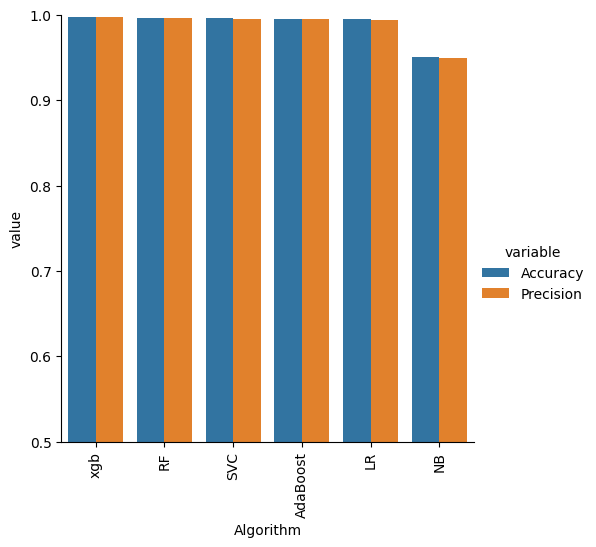

In [35]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
# select for voting classifer
svc = SVC(kernel='linear', C=1.0)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [38]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('RandomForest',rfc), ('AdaBoost',abc), ('xgb',xgb), ('SVC',svc)])

In [39]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('AdaBoost', AdaBoostClassifier(random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('SVC', SVC(kernel='linear'))])

In [40]:
model = voting
voting = model

In [42]:
y_pred = voting.predict(X_test)
print('Accuracy:...',accuracy_score(y_test,y_pred))
print('Precision:...',precision_score(y_test,y_pred))

Accuracy:... 0.9975152473458324
Precision:... 0.9981369352585002
